

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv(r"C:\Users\Workstation\Downloads\adult.data", 
                   header=None, 
                   skipinitialspace=True, 
                   names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                          "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                          "hours-per-week", "native-country", "50K"])
data.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [11]:
data.groupby('sex').sex.count()

sex
Female    10771
Male      21790
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [16]:
data[data.sex=='Male'].age.mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [19]:
(len(data[data['native-country']=='United-States']))/len(data)

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

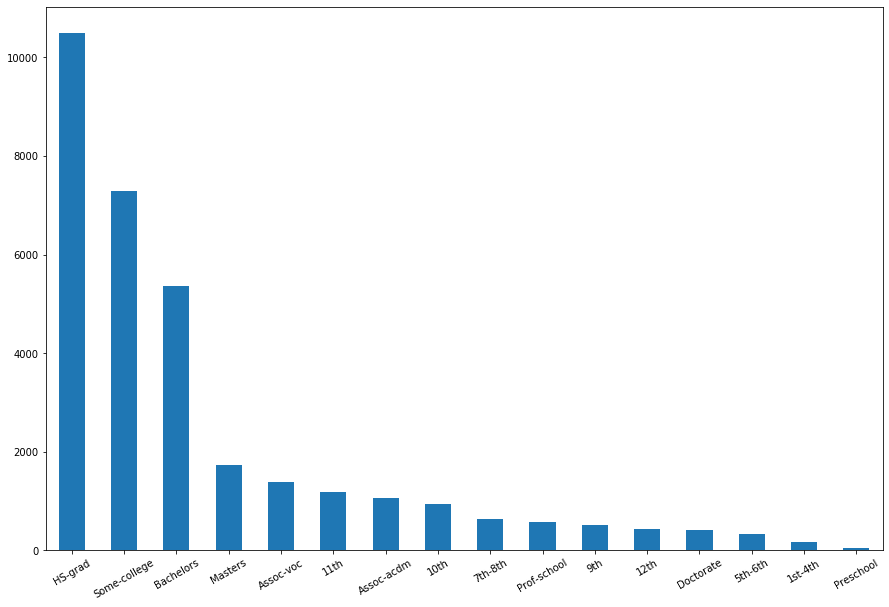

In [20]:
df = data.education.value_counts()
df.plot.bar(figsize=(15,10), rot=30)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [28]:
average = np.mean(data[data['marital-status']=='Divorced'].fnlwgt)
standart = np.std(data[data['marital-status']=='Divorced'].fnlwgt)
print(average)
print(standart)

185802.79045689848
105634.89966249917


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [33]:
df = data[data['50K']=='>50K'].education.value_counts()
#There are three main levels of higher education:
#undergraduate studies (bachelor’s degree), graduate studies (master’s degree) and postgraduate studies (doctor’s degree).
high_edu = df.Bachelors + df.Masters + df.Doctorate
no_high_edu = df.sum() - high_edu
print('high_rdu ', high_edu)
print('no_high_edu ', no_high_edu)
print(high_edu/no_high_edu > 1)

high_rdu  3486
no_high_edu  4355
False


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [38]:
male = data[data.sex=='Male'].groupby('race').age.max()
fem = data[data.sex=='Female'].groupby('race').age.max()
print('максимальный возраст мужчин ', '\n', male, '\n')
print('максимальный возраст женщин ', '\n', fem)

максимальный возраст мужчин  
 race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64 

максимальный возраст женщин  
 race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [43]:
data[data.occupation=='Farming-fishing'].groupby('native-country').occupation.count()

native-country
?                  5
Cambodia           1
Canada             2
Cuba               2
El-Salvador        2
England            1
France             1
Germany            1
Guatemala          4
Hong               1
Ireland            1
Italy              2
Japan              1
Mexico            77
Philippines        4
Poland             1
Portugal           1
Puerto-Rico        5
United-States    879
Vietnam            2
Yugoslavia         1
Name: occupation, dtype: int64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [46]:
male_bac = data[(data.sex=='Male') & (data.education=='Bachelors')].sex.count()
male_mag = data[(data.sex=='Male') & (data.education=='Masters')].sex.count()
female_bac = data[(data.sex=='Female') & (data.education=='Bachelors')].sex.count()
female_mag = data[(data.sex=='Female') & (data.education=='Masters')].sex.count()
print('1) ', male_bac/male_mag)
print('2) ', female_bac/female_mag)
if male_bac/male_mag > female_bac/female_mag:
    print('количество мужчин-бакалавров к количеству мужчин-магистров больше')
else:
    print('женщин-бакалавров к количеству женщин-магистров больше')

1)  3.14743049705139
2)  3.0205223880597014
количество мужчин-бакалавров к количеству мужчин-магистров больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [49]:
max_hours = data['hours-per-week'].max()
print(max_hours)

99


In [53]:
print('как много:', len(data[data['hours-per-week']==99]))
data[data['hours-per-week']==99].groupby('50K').age.count()

как много: 85


50K
<=50K    60
>50K     25
Name: age, dtype: int64